In [98]:
#!/usr/bin/env python
# coding: utf-8
import numpy as np 
import pandas as pd 
from pathlib import Path 
import random 
import os
import math
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import dates
from datetime import datetime
import re
import calendar
import json
import time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from datetime import datetime



# scikit-learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, cohen_kappa_score, confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# spacy
import spacy
from spacy.lang.en import English

#scipy
from scipy.stats import ks_2samp
import plotly.express as px
# df['date'] = df["CallDateAndTimeStart"].astype('datetime64[ns]')
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
import plotly.graph_objects as go
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)



/Users/nafis.abrar/opt/miniconda3/envs/mta2/lib/python3.7/site-packages/ipykernel_launcher.py:52: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


## New Business dataset



In [21]:
file = "./data/montr.csv"

df = pd.read_csv(file)
# df['Are you satisfied with your current delivery service?'].unique()
df.nunique()

Unnamed: 0                                                                                                                            1896
Answer ID                                                                                                                             1896
Date                                                                                                                                  85  
Phase                                                                                                                                 4   
Type of territory                                                                                                                     2   
Borough / Linked city                                                                                                                 28  
Trade status                                                                                                                          4   
Stakes: Financial support? 

In [25]:
df["Trade status"]

0       Ouvert              
1       Partiellement ouvert
2       Ouvert              
3       Fermé               
4       Statut inconnu      
5       Ouvert              
6       Partiellement ouvert
7       Partiellement ouvert
8       Fermé               
9       Ouvert              
10      Ouvert              
11      Partiellement ouvert
12      Fermé               
13      Fermé               
14      Partiellement ouvert
15      Ouvert              
16      Fermé               
17      Fermé               
18      Ouvert              
19      Fermé               
20      Ouvert              
21      Partiellement ouvert
22      Fermé               
23      Ouvert              
24      Partiellement ouvert
25      Ouvert              
26      Fermé               
27      Partiellement ouvert
28      Fermé               
29      Partiellement ouvert
30      Fermé               
31      Ouvert              
32      Statut inconnu      
33      Partiellement ouvert
34      Statut

In [27]:
df["label"] = df["Trade status"]
df = df.drop(["Trade status"],axis=1)

In [28]:
df1 = df.drop(["Phase","Unnamed: 0","Answer ID","Date"], axis=1)

In [69]:
df['label'].unique()
df['Borough / Linked city'].unique()

array(['Ouvert', 'Partiellement ouvert', 'Fermé', 'Statut inconnu'],
      dtype=object)

array(['Le Plateau-Mont-Royal', 'Outremont',
       'Côte-des-Neiges-Notre-Dame-de-Grâce', 'Ahuntsic-Cartierville',
       'Rosemont-La Petite-Patrie',
       'Villeray-Saint-Michel-Parc-Extension', 'Verdun', nan,
       'Le Sud-Ouest', 'Westmount', 'Mont-Royal', 'Saint-Laurent',
       'Montréal-Nord', 'Saint-Léonard',
       'Rivière-des-Prairies-Pointe-aux-Trembles', 'Ville-Marie',
       'Mercier-Hochelaga-Maisonneuve', 'Kirkland', 'Pierrefonds-Roxboro',
       'LaSalle', 'Dollard-des-Ormeaux', 'Anjou', 'Pointe-Claire',
       'Montréal-Ouest', 'Beaconsfield', 'Dorval',
       "L'Île-Bizard-Sainte-Geneviève", 'Lachine',
       'Île-Bizard-Sainte-Geneviève'], dtype=object)

## Encoding our categorical variable 

In [35]:
dic_list = []
for col in df1.columns:
    labels = df1[col].astype('category').cat.categories.tolist()
    replace_map_comp = {col : {k: v for k,v in zip(labels,list(range(0,len(labels)+1)))}}
    print(replace_map_comp[col])
    dic_list.append(replace_map_comp[col])
    df1.replace(replace_map_comp, inplace=True)

{0: 0, 'Arrondissement': 1, 'Ville liée': 2}
{0: 0, 'Ahuntsic-Cartierville': 1, 'Anjou': 2, 'Beaconsfield': 3, 'Côte-des-Neiges-Notre-Dame-de-Grâce': 4, 'Dollard-des-Ormeaux': 5, 'Dorval': 6, 'Kirkland': 7, "L'Île-Bizard-Sainte-Geneviève": 8, 'LaSalle': 9, 'Lachine': 10, 'Le Plateau-Mont-Royal': 11, 'Le Sud-Ouest': 12, 'Mercier-Hochelaga-Maisonneuve': 13, 'Mont-Royal': 14, 'Montréal-Nord': 15, 'Montréal-Ouest': 16, 'Outremont': 17, 'Pierrefonds-Roxboro': 18, 'Pointe-Claire': 19, 'Rivière-des-Prairies-Pointe-aux-Trembles': 20, 'Rosemont-La Petite-Patrie': 21, 'Saint-Laurent': 22, 'Saint-Léonard': 23, 'Verdun': 24, 'Ville-Marie': 25, 'Villeray-Saint-Michel-Parc-Extension': 26, 'Westmount': 27, 'Île-Bizard-Sainte-Geneviève': 28}
{0: 0, 'Oui': 1}
{0: 0, 'Oui': 1}
{0: 0, 'Oui': 1}
{0: 0, 'Oui': 1}
{0: 0, 'Oui': 1}
{0: 0, 'Oui': 1}
{0: 0, 'Oui': 1}
{0: 0, 'Oui': 1}
{0: 0, 'Oui': 1}
{0: 0, 'Oui': 1}
{0: 0, 'Oui': 1}
{'Non': 0, 'Oui': 1, 'Sans réponse': 2}
{'Non': 0, 'Oui': 1, 'Sans réponse': 

In [36]:
df_encoded = pd.DataFrame.from_dict(dic_list)
df_encoded


,0,Arrondissement,Ville liée,Ahuntsic-Cartierville,Anjou,Beaconsfield,Côte-des-Neiges-Notre-Dame-de-Grâce,Dollard-des-Ormeaux,Dorval,Kirkland,L'Île-Bizard-Sainte-Geneviève,LaSalle,Lachine,Le Plateau-Mont-Royal,Le Sud-Ouest,Mercier-Hochelaga-Maisonneuve,Mont-Royal,Montréal-Nord,Montréal-Ouest,Outremont,Pierrefonds-Roxboro,Pointe-Claire,Rivière-des-Prairies-Pointe-aux-Trembles,Rosemont-La Petite-Patrie,Saint-Laurent,Saint-Léonard,Verdun,Ville-Marie,Villeray-Saint-Michel-Parc-Extension,Westmount,Île-Bizard-Sainte-Geneviève,Oui,Non,Sans réponse,Non applicable,Réponse inconnue,"Oui, à l'aide d'un système maison, mais seulement depuis la crise",Pas de vente en ligne,Site transactionnel,"Système maison, disponible avant la crise","Via un tiers (ex. : Amazon, Wayfair, Uber Eats, etc.)",Je l'utilise déjà,Je ne sais pas,"Non, j'ai déjà ce qu'il me faut pour faire un virage numérique","Non, je n'ai pas d'intérêt à faire un virage numérique",Oui (service maison),Oui (via un tiers),Question non posée lors de l'appel,Insatisfait,Moyennement satisfait,Satisfait,"Non, Non-applicable","Oui, Non-applicable",Fermé,Ouvert,Partiellement ouvert,Statut inconnu
0,0.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Fill na values

In [37]:
df1 = df1.fillna(0)
for col in df1.columns:
    df1[col] = df1[col].astype(int)


## Let's check our encoded data

In [38]:
df1.head()

,Type of territory,Borough / Linked city,Stakes: Financial support?,Stakes: Maintenance of operations?,Stakes: Taxation (taxes and levies)?,Stakes: Human resources?,Stakes: Regulation?,Stakes: Marketing?,Stakes: Health and safety?,Stakes: Search for sanitary equipment?,Stakes: Space planning?,Stakes: Permit for outdoor terraces?,Stakes: Other?,Interest in the emergency aid program?,Social media presence?,Presence on Facebook?,Presence on Twitter?,Presence on Instagram?,Presence on LinkedIn?,Do you sell online?,Online sales channel,Do you know the urban delivery service?,Are you interested in the urban delivery service?,Interest in the support program for the digital transformation of companies?,Do you offer a delivery service?,Are you satisfied with your current delivery service?,Would you be interested in the urban delivery service (by bike) set up by the City of Montreal and its partners if you had access?,Was the information we gave you useful to you?,label
0,1,11,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,3,4,2,4,3,5,0,1
1,1,17,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,3,2,4,3,5,1,2
2,1,11,0,0,0,1,0,0,1,1,0,0,1,1,1,1,0,1,0,2,4,2,1,1,4,3,5,1,1
3,1,11,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,4,3,5,1,0
4,1,11,1,1,0,0,0,1,1,1,0,0,0,1,1,1,0,1,0,2,4,0,3,3,4,3,5,1,3


#### EDA

Let's see the relationship between business statuses and whether they sell online

In [62]:
df_grouped = df1.groupby(["label", "Do you sell online?"]).agg(
        count_col=pd.NamedAgg(column="Do you sell online?",aggfunc="count"))
df_grouped

count_col
label Do you sell online?           
0     0                    79       
      1                    21       
      2                    37       
      3                    12       
1     0                    542      
      1                    127      
      2                    209      
      3                    376      
2     0                    158      
      1                    35       
      2                    89       
      3                    46       
3     0                    7        
      1                    3        
      2                    5        
      3                    150

### For each business status check whether they sell online

array([[<AxesSubplot:title={'center':'Fermé'}>,
        <AxesSubplot:title={'center':'Ouvert'}>],
       [<AxesSubplot:title={'center':'Partiellement ouvert'}>,
        <AxesSubplot:title={'center':'Statut inconnu'}>]], dtype=object)

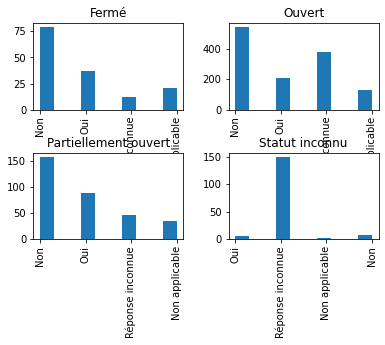

In [75]:

dic = {'Fermé': 0, 'Ouvert': 1, 'Partiellement ouvert': 2, 'Statut inconnu': 3}
response = 'Non', 'Oui', 'Réponse inconnue', 'Non applicable'
df['Do you sell online?'].hist(by=df['label'])


### For each business status check whether they have social media presence

x axis :

0:'Non', 

1:'Oui', 

2:'Sans response', 



array([[<AxesSubplot:title={'center':'Fermé'}>,
        <AxesSubplot:title={'center':'Ouvert'}>],
       [<AxesSubplot:title={'center':'Partiellement ouvert'}>,
        <AxesSubplot:title={'center':'Statut inconnu'}>]], dtype=object)

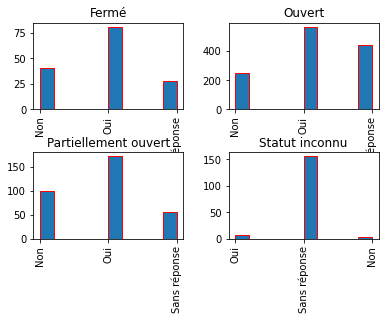

In [88]:

dic = {'Fermé': 0, 'Ouvert': 1, 'Partiellement ouvert': 2, 'Statut inconnu': 3}
response = 'Non', 'Oui', 'Réponse inconnue', 'Non applicable'
df['Social media presence?'].hist(by=df['label'],edgecolor="red")


##### For each business status check whether they have social media presence

x axis :

0:'Non', 

1:'Oui', 

2:'Sans response', 




### For each business status check where they are located



In [80]:
df_grouped = df.groupby(["label", "Borough / Linked city"]).agg(
        count_col=pd.NamedAgg(column="Borough / Linked city",aggfunc="count"))
df_grouped

count_col
label                Borough / Linked city                              
Fermé                Ahuntsic-Cartierville                     11       
                     Anjou                                     1        
                     Côte-des-Neiges-Notre-Dame-de-Grâce       8        
                     Dollard-des-Ormeaux                       1        
                     L'Île-Bizard-Sainte-Geneviève             1        
                     LaSalle                                   3        
                     Le Plateau-Mont-Royal                     23       
                     Le Sud-Ouest                              1        
                     Mercier-Hochelaga-Maisonneuve             2        
                     Mont-Royal                                1        
                     Montréal-Nord                             2        
                     Outremont                                 1        
                     Pierrefonds-Roxboro                       2        
                     Rosemont-La Petite-Patrie                 18       
                     Saint-Laurent                             3        
                     Saint-Léonard                             3        
                     Verdun                                    8        
                     Ville-Marie                               5        
                     Villeray-Saint-Michel-Parc-Extension      39       
                     Westmount                                 8        
Ouvert               Ahuntsic-Cartierville                     38       
                     Anjou                                     12       
                     Beaconsfield                              2        
                     Côte-des-Neiges-Notre-Dame-de-Grâce       111      
                     Dollard-des-Ormeaux                       22       
                     Dorval                                    7        
                     Kirkland                                  11       
                     L'Île-Bizard-Sainte-Geneviève             3        
                     LaSalle                                   33       
                     Lachine                                   1        
                     Le Plateau-Mont-Royal                     82       
                     Le Sud-Ouest                              10       
                     Mercier-Hochelaga-Maisonneuve             45       
                     Mont-Royal                                3        
                     Montréal-Nord                             51       
                     Montréal-Ouest                            4        
                     Outremont                                 11       
                     Pierrefonds-Roxboro                       45       
                     Pointe-Claire                             14       
                     Rivière-des-Prairies-Pointe-aux-Trembles  22       
                     Rosemont-La Petite-Patrie                 89       
                     Saint-Laurent                             33       
                     Saint-Léonard                             43       
                     Verdun                                    11       
                     Ville-Marie                               44       
                     Villeray-Saint-Michel-Parc-Extension      106      
                     Westmount                                 9        
                     Île-Bizard-Sainte-Geneviève               2        
Partiellement ouvert Ahuntsic-Cartierville                     10       
                     Anjou                                     2        
                     Côte-des-Neiges-Notre-Dame-de-Grâce       22       
                     Dollard-des-Ormeaux                       6        
                     Dorval                                    4        
                     Kirkland                   

array([[<AxesSubplot:title={'center':'Fermé'}>,
        <AxesSubplot:title={'center':'Ouvert'}>],
       [<AxesSubplot:title={'center':'Partiellement ouvert'}>,
        <AxesSubplot:title={'center':'Statut inconnu'}>]], dtype=object)

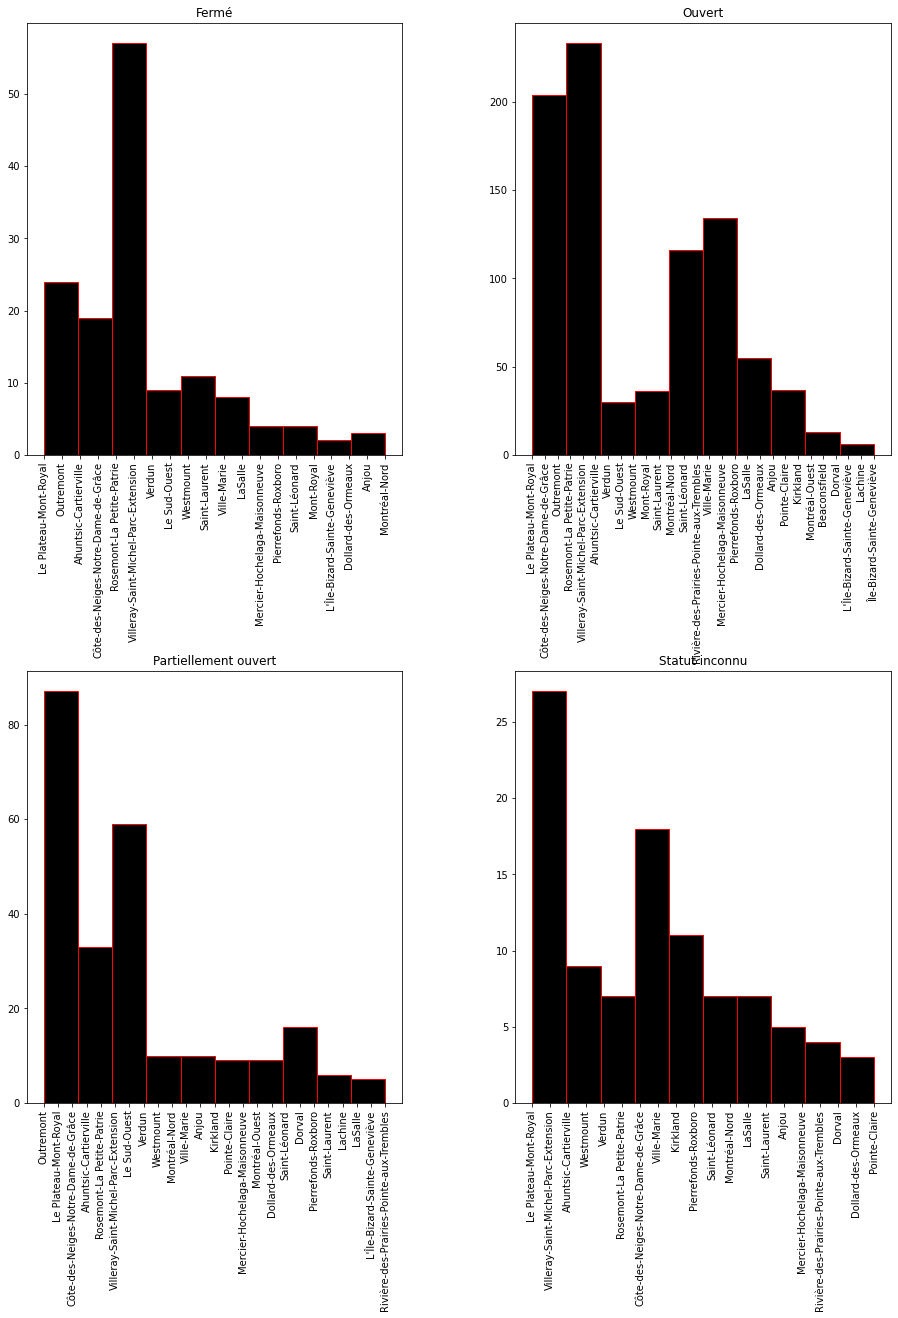

In [90]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df['Borough / Linked city'].hist(by=df['label'],ax=ax,color = "black", edgecolor='red')

array([[<AxesSubplot:title={'center':'Fermé'}>,
        <AxesSubplot:title={'center':'Ouvert'}>],
       [<AxesSubplot:title={'center':'Partiellement ouvert'}>,
        <AxesSubplot:title={'center':'Statut inconnu'}>]], dtype=object)

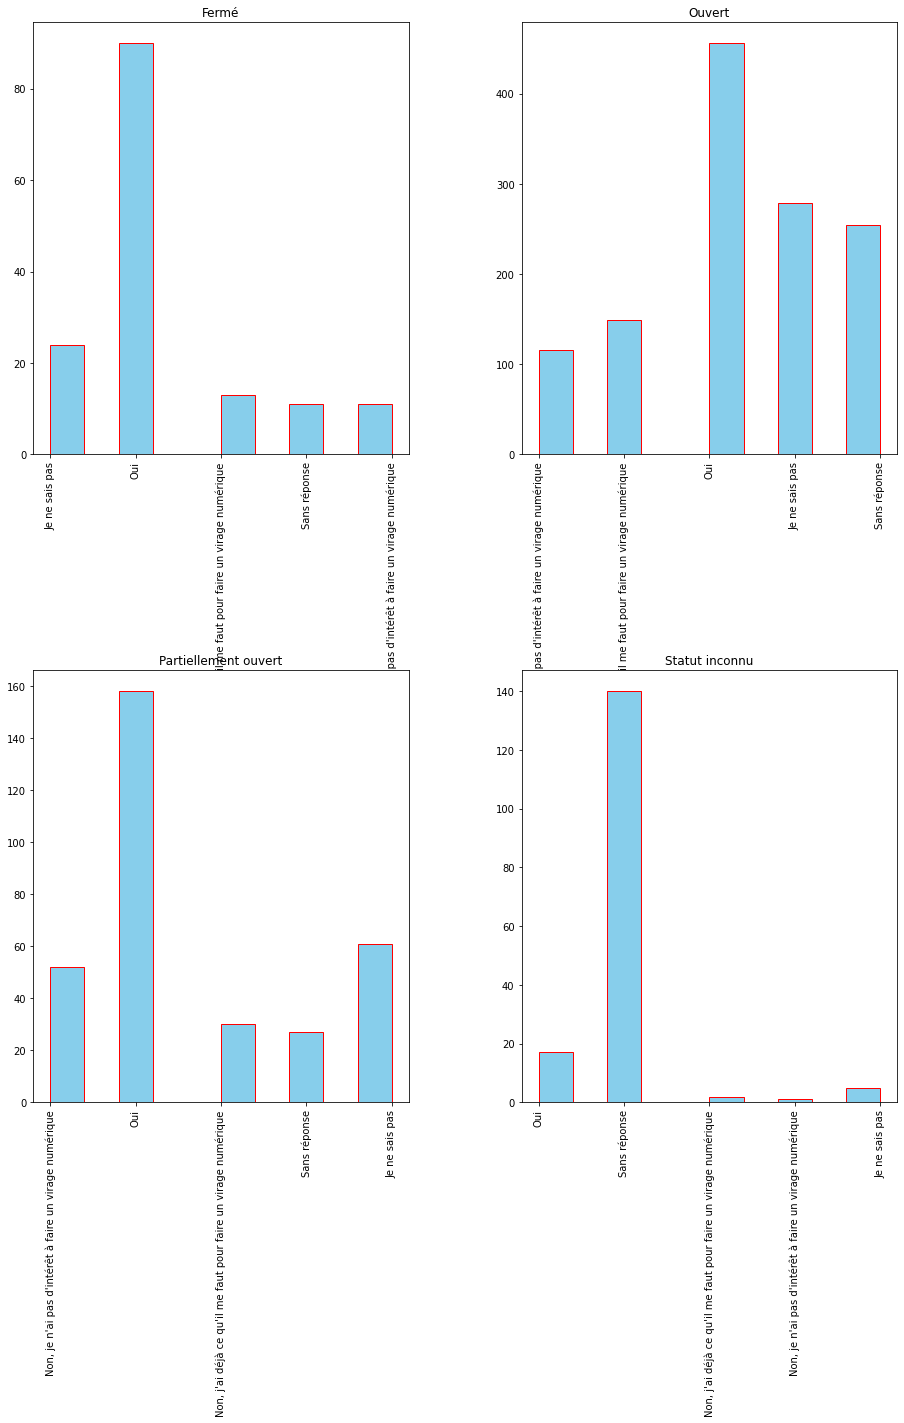

In [86]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df['Interest in the support program for the digital transformation of companies?'].hist(by=df['label'],ax=ax,color = "skyblue", edgecolor='red')

## Let's check Correlation

In [91]:
df1.corr()

,Type of territory,Borough / Linked city,Stakes: Financial support?,Stakes: Maintenance of operations?,Stakes: Taxation (taxes and levies)?,Stakes: Human resources?,Stakes: Regulation?,Stakes: Marketing?,Stakes: Health and safety?,Stakes: Search for sanitary equipment?,Stakes: Space planning?,Stakes: Permit for outdoor terraces?,Stakes: Other?,Interest in the emergency aid program?,Social media presence?,Presence on Facebook?,Presence on Twitter?,Presence on Instagram?,Presence on LinkedIn?,Do you sell online?,Online sales channel,Do you know the urban delivery service?,Are you interested in the urban delivery service?,Interest in the support program for the digital transformation of companies?,Do you offer a delivery service?,Are you satisfied with your current delivery service?,Would you be interested in the urban delivery service (by bike) set up by the City of Montreal and its partners if you had access?,Was the information we gave you useful to you?,label
Type of territory,1.000000,0.614547,0.034504,0.095496,0.060596,-0.032069,0.107461,0.135008,0.215304,0.129052,0.173122,-0.023674,0.010155,-0.046981,-0.061424,-0.088161,0.026524,-0.102700,0.050057,-0.043112,-0.077240,-0.470355,-0.453432,0.041698,0.392119,-0.301082,0.426881,-0.033767,-0.069859
Borough / Linked city,0.614547,1.000000,0.020916,0.056204,0.042282,-0.023188,0.113072,0.125172,0.193628,0.129005,0.159649,-0.028976,0.023408,-0.070962,-0.114849,-0.078971,0.027752,-0.104859,0.046910,-0.089062,-0.096143,-0.442931,-0.401603,0.014049,0.305900,-0.246273,0.350600,-0.059854,-0.096058
Stakes: Financial support?,0.034504,0.020916,1.000000,0.153609,0.176779,0.082620,0.061541,0.266757,0.138995,0.101799,0.153040,0.059290,0.040480,-0.177217,-0.307441,0.160233,0.029811,0.047970,0.033704,-0.278629,-0.181761,-0.204323,-0.198359,-0.180823,-0.096387,-0.148957,-0.093321,-0.308294,-0.210810
Stakes: Maintenance of operations?,0.095496,0.056204,0.153609,1.000000,0.194982,0.178954,0.171788,0.260269,0.288704,0.175627,0.241401,-0.003271,0.169917,-0.103412,-0.127584,0.107370,0.053378,0.093608,0.088303,-0.117119,-0.061541,-0.181026,-0.113069,-0.070792,0.033721,-0.039858,0.035291,-0.117403,-0.027754
Stakes: Taxation (taxes and levies)?,0.060596,0.042282,0.176779,0.194982,1.000000,0.129787,0.112176,0.247811,0.248679,0.131573,0.235241,0.011778,0.100951,-0.083646,-0.035800,-0.028216,0.010161,-0.017310,-0.005628,-0.045951,-0.068327,-0.104450,-0.079611,-0.044634,-0.000669,-0.027796,0.011997,-0.110311,-0.027096
Stakes: Human resources?,-0.032069,-0.023188,0.082620,0.178954,0.129787,1.000000,0.053534,0.062622,0.127376,0.145969,0.106889,0.023238,0.877673,-0.106103,-0.081791,0.158482,0.062025,0.100496,0.080699,-0.094847,-0.054961,-0.018362,0.004830,-0.093434,-0.080486,-0.000964,-0.090629,-0.110825,0.008094
Stakes: Regulation?,0.107461,0.113072,0.061541,0.171788,0.112176,0.053534,1.000000,0.085826,0.257565,0.226713,0.212034,-0.017666,0.067733,-0.063942,-0.142680,0.054330,0.094459,0.090318,0.061982,-0.114443,-0.018606,-0.190793,-0.172328,-0.047477,0.087275,-0.066265,0.093593,-0.089616,-0.057162
Stakes: Marketing?,0.135008,0.125172,0.266757,0.260269,0.247811,0.062622,0.085826,1.000000,0.270918,0.059527,0.319073,0.003242,0.037940,-0.117979,-0.127001,0.125663,0.037771,0.031324,0.066807,-0.183075,-0.093554,-0.289567,-0.207212,-0.002769,0.080955,-0.106522,0.095812,-0.143245,-0.113760
Stakes: Health and safety?,0.215304,0.193628,0.138995,0.288704,0.248679,0.127376,0.257565,0.270918,1.000000,0.371887,0.507832,-0.031329,0.119860,-0.154642,-0.134535,0.107280,0.057595,0.080545,0.049074,-0.166198,-0.038205,-0.360073,-0.307552,-0.080580,0.154776,-0.117517,0.165981,-0.140867,-0.099764
Stakes: Search for sanitary equipment?,0.129052,0.129005,0.101799,0.175627,0.131573,0.145969,0.226713,0.059527,0.371887,1.000000,0.280586,0.021198,0.141732,-0.066664,-0.168757,0.105049,0.045652,0.109132,0.028186,-0.143017,-0.029783,-0.177493,-0.146894,-0.017865,0.011922,-0.093973,0.043201,-0.086931,-0.016858


([<matplotlib.axis.XTick at 0x7fa29ba14c50>,
 [Text(0, 1, 'Type of territory'),
  Text(1, 1, 'Borough / Linked city'),
  Text(2, 1, 'Stakes: Financial support?'),
  Text(3, 1, 'Stakes: Maintenance of operations?'),
  Text(4, 1, 'Stakes: Taxation (taxes and levies)?'),
  Text(5, 1, 'Stakes: Human resources?'),
  Text(6, 1, 'Stakes: Regulation?'),
  Text(7, 1, 'Stakes: Marketing?'),
  Text(8, 1, 'Stakes: Health and safety?'),
  Text(9, 1, 'Stakes: Search for sanitary equipment?'),
  Text(10, 1, 'Stakes: Space planning?'),
  Text(11, 1, 'Stakes: Permit for outdoor terraces?'),
  Text(12, 1, 'Stakes: Other?'),
  Text(13, 1, 'Interest in the emergency aid program?'),
  Text(14, 1, 'Social media presence?'),
  Text(15, 1, 'Presence on Facebook?'),
  Text(16, 1, 'Presence on Twitter?'),
  Text(17, 1, 'Presence on Instagram?'),
  Text(18, 1, 'Presence on LinkedIn?'),
  Text(19, 1, 'Do you sell online?'),
  Text(20, 1, 'Online sales channel'),
  Text(21, 1, 'Do you know the urban delivery servi

([<matplotlib.axis.YTick at 0x7fa29ba15ed0>,
 [Text(0, 0, 'Type of territory'),
  Text(0, 1, 'Borough / Linked city'),
  Text(0, 2, 'Stakes: Financial support?'),
  Text(0, 3, 'Stakes: Maintenance of operations?'),
  Text(0, 4, 'Stakes: Taxation (taxes and levies)?'),
  Text(0, 5, 'Stakes: Human resources?'),
  Text(0, 6, 'Stakes: Regulation?'),
  Text(0, 7, 'Stakes: Marketing?'),
  Text(0, 8, 'Stakes: Health and safety?'),
  Text(0, 9, 'Stakes: Search for sanitary equipment?'),
  Text(0, 10, 'Stakes: Space planning?'),
  Text(0, 11, 'Stakes: Permit for outdoor terraces?'),
  Text(0, 12, 'Stakes: Other?'),
  Text(0, 13, 'Interest in the emergency aid program?'),
  Text(0, 14, 'Social media presence?'),
  Text(0, 15, 'Presence on Facebook?'),
  Text(0, 16, 'Presence on Twitter?'),
  Text(0, 17, 'Presence on Instagram?'),
  Text(0, 18, 'Presence on LinkedIn?'),
  Text(0, 19, 'Do you sell online?'),
  Text(0, 20, 'Online sales channel'),
  Text(0, 21, 'Do you know the urban delivery servi

Text(0.5, 1.0, 'Correlation Matrix')

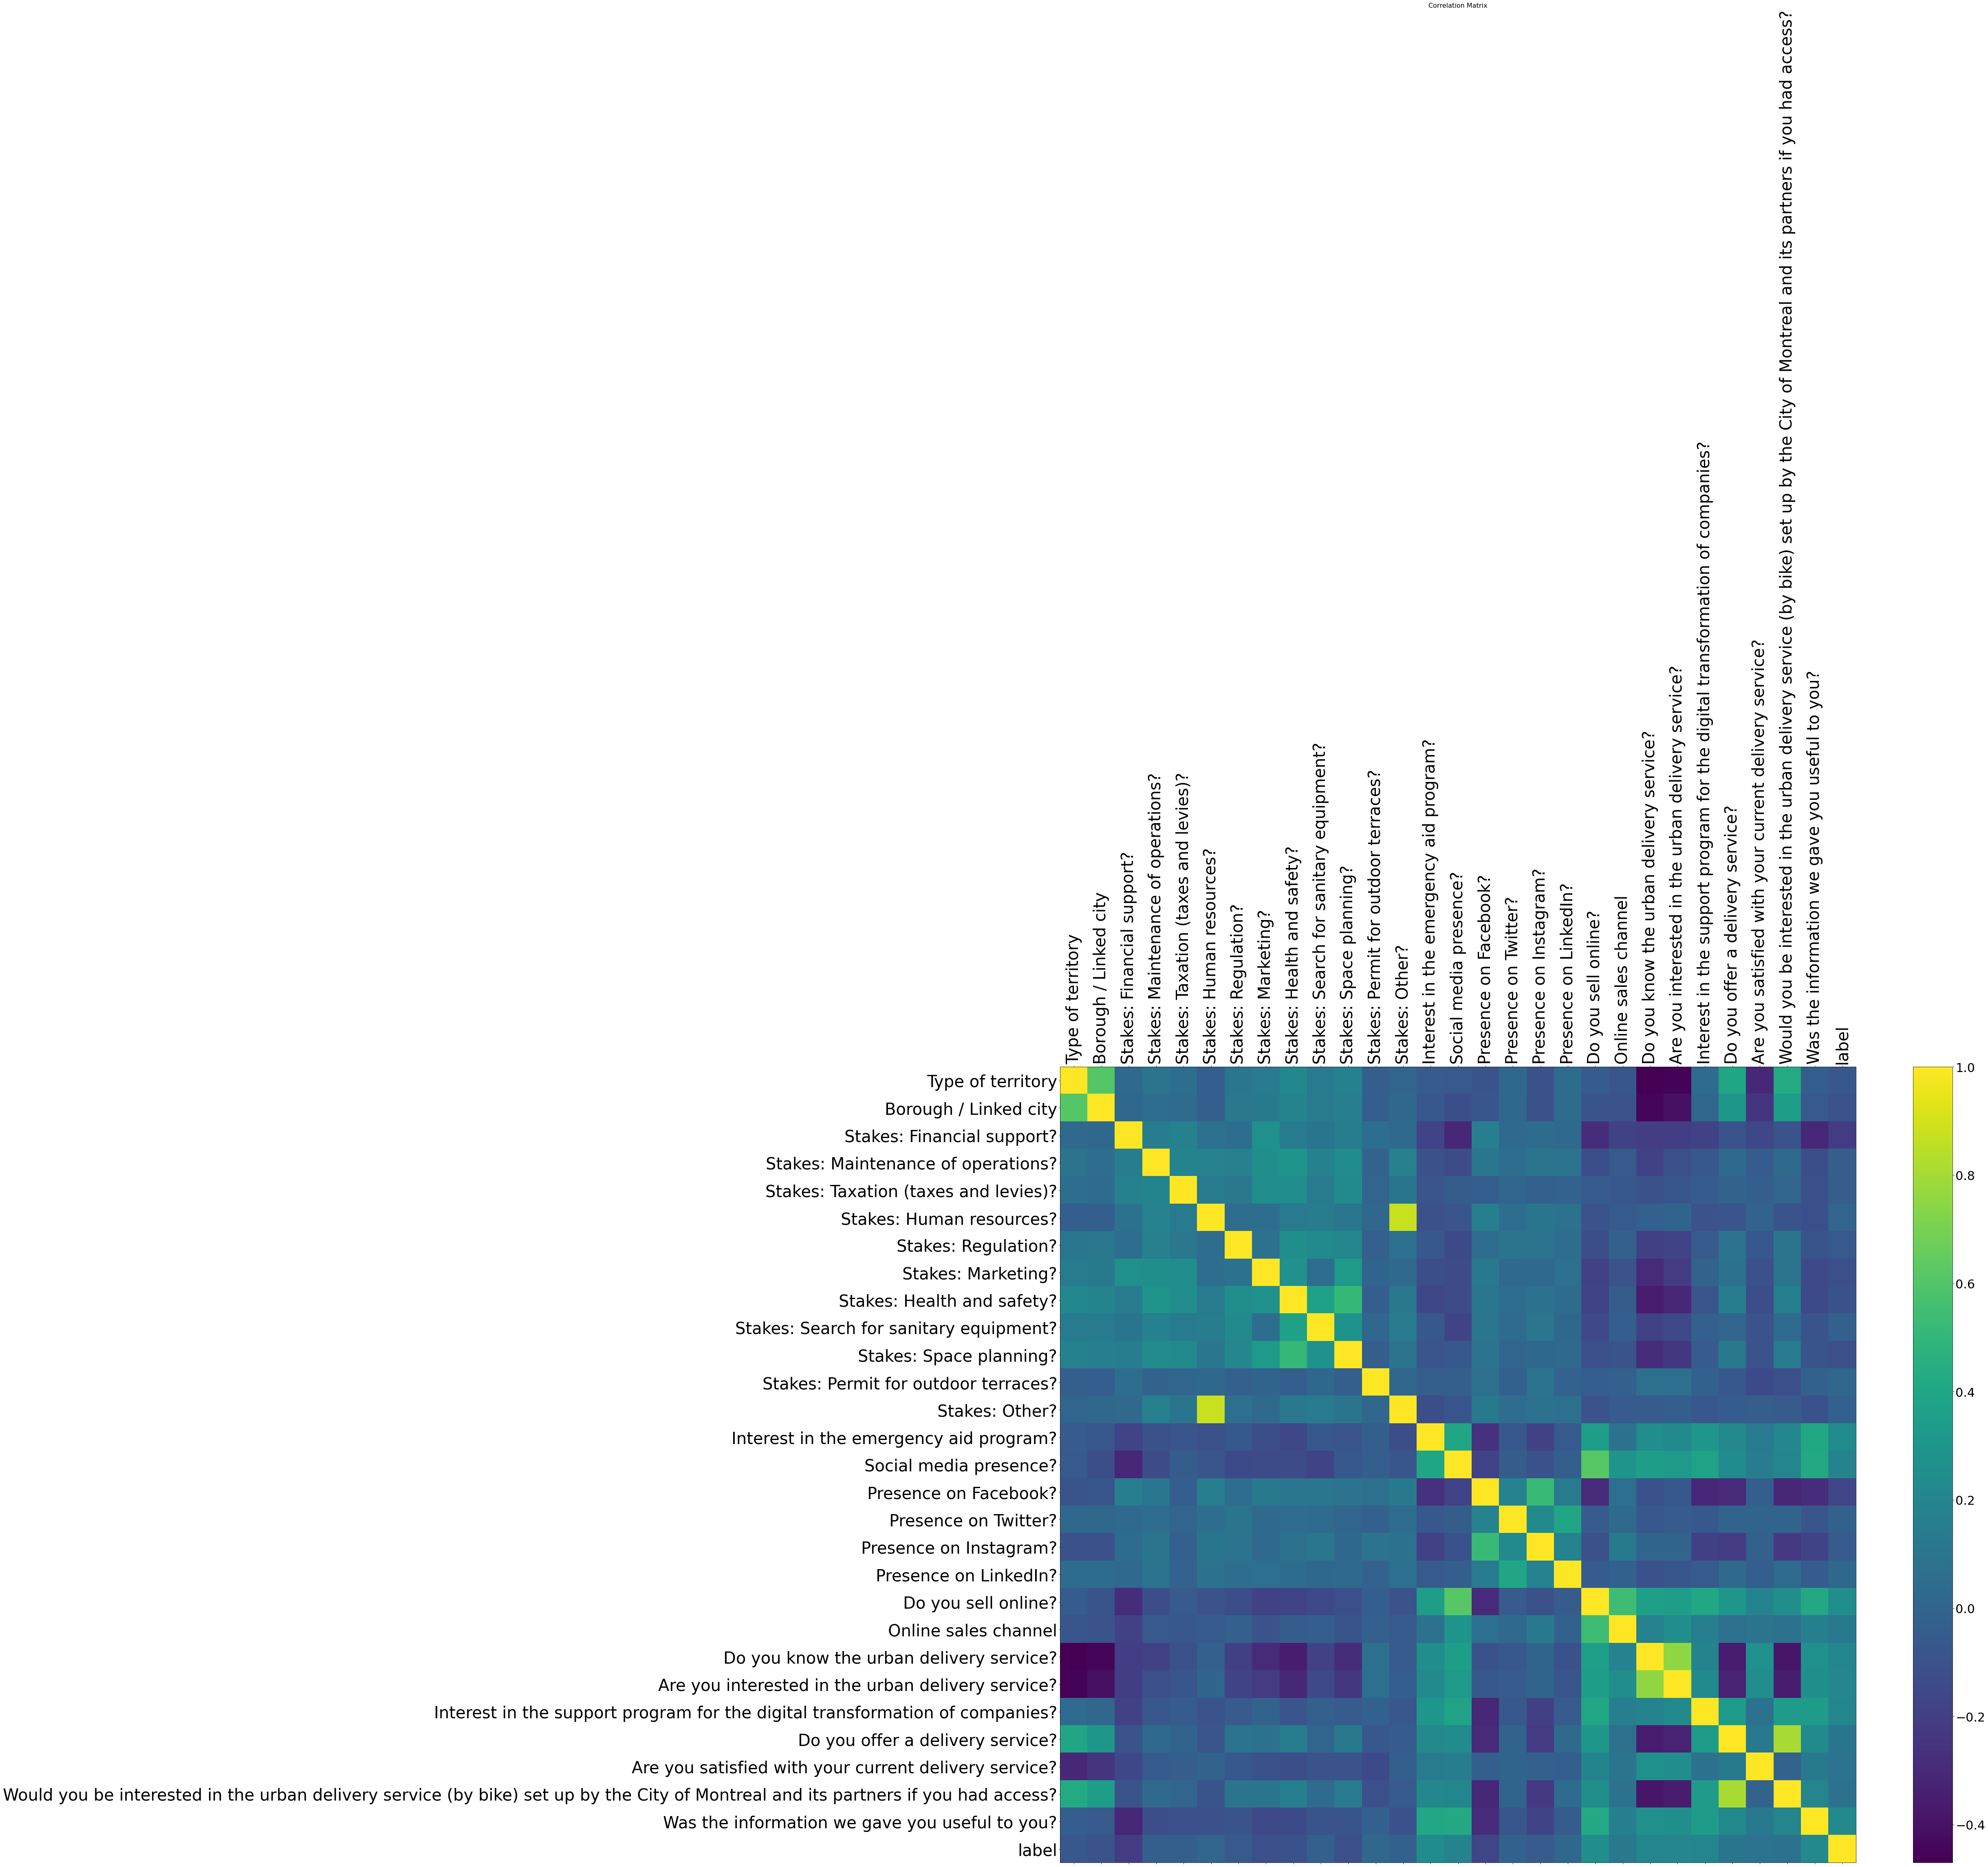

In [92]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(50, 35))
plt.matshow(df1.corr(), fignum=f.number)
plt.xticks(range(df1.shape[1]), df1.columns, fontsize=40, rotation=90)
plt.yticks(range(df1.shape[1]), df1.columns, fontsize=40)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=30)
plt.title('Correlation Matrix', fontsize=16);
plt.savefig("correlation.png", bbox_inches='tight', pad_inches=0.0)

In [544]:
corr = df1.corr()
x = corr.style.background_gradient(cmap='coolwarm',axis=None).set_precision(2)
x

,Type of territory,Borough / Linked city,Stakes: Financial support?,Stakes: Maintenance of operations?,Stakes: Taxation (taxes and levies)?,Stakes: Human resources?,Stakes: Regulation?,Stakes: Marketing?,Stakes: Health and safety?,Stakes: Search for sanitary equipment?,Stakes: Space planning?,Stakes: Permit for outdoor terraces?,Stakes: Other?,Interest in the emergency aid program?,Social media presence?,Presence on Facebook?,Presence on Twitter?,Presence on Instagram?,Presence on LinkedIn?,Do you sell online?,Online sales channel,Do you know the urban delivery service?,Are you interested in the urban delivery service?,Interest in the support program for the digital transformation of companies?,Do you offer a delivery service?,Are you satisfied with your current delivery service?,Would you be interested in the urban delivery service (by bike) set up by the City of Montreal and its partners if you had access?,Was the information we gave you useful to you?,label
Type of territory,1.00,0.61,0.03,0.10,0.06,-0.03,0.11,0.14,0.22,0.13,0.17,-0.02,0.01,-0.05,-0.06,-0.09,0.03,-0.10,0.05,-0.04,-0.08,-0.47,-0.45,0.04,0.39,-0.30,0.43,-0.03,-0.07
Borough / Linked city,0.61,1.00,0.02,0.06,0.04,-0.02,0.11,0.13,0.19,0.13,0.16,-0.03,0.02,-0.07,-0.11,-0.08,0.03,-0.10,0.05,-0.09,-0.10,-0.44,-0.40,0.01,0.31,-0.25,0.35,-0.06,-0.10
Stakes: Financial support?,0.03,0.02,1.00,0.15,0.18,0.08,0.06,0.27,0.14,0.10,0.15,0.06,0.04,-0.18,-0.31,0.16,0.03,0.05,0.03,-0.28,-0.18,-0.20,-0.20,-0.18,-0.10,-0.15,-0.09,-0.31,-0.21
Stakes: Maintenance of operations?,0.10,0.06,0.15,1.00,0.19,0.18,0.17,0.26,0.29,0.18,0.24,-0.00,0.17,-0.10,-0.13,0.11,0.05,0.09,0.09,-0.12,-0.06,-0.18,-0.11,-0.07,0.03,-0.04,0.04,-0.12,-0.03
Stakes: Taxation (taxes and levies)?,0.06,0.04,0.18,0.19,1.00,0.13,0.11,0.25,0.25,0.13,0.24,0.01,0.10,-0.08,-0.04,-0.03,0.01,-0.02,-0.01,-0.05,-0.07,-0.10,-0.08,-0.04,-0.00,-0.03,0.01,-0.11,-0.03
Stakes: Human resources?,-0.03,-0.02,0.08,0.18,0.13,1.00,0.05,0.06,0.13,0.15,0.11,0.02,0.88,-0.11,-0.08,0.16,0.06,0.10,0.08,-0.09,-0.05,-0.02,0.00,-0.09,-0.08,-0.00,-0.09,-0.11,0.01
Stakes: Regulation?,0.11,0.11,0.06,0.17,0.11,0.05,1.00,0.09,0.26,0.23,0.21,-0.02,0.07,-0.06,-0.14,0.05,0.09,0.09,0.06,-0.11,-0.02,-0.19,-0.17,-0.05,0.09,-0.07,0.09,-0.09,-0.06
Stakes: Marketing?,0.14,0.13,0.27,0.26,0.25,0.06,0.09,1.00,0.27,0.06,0.32,0.00,0.04,-0.12,-0.13,0.13,0.04,0.03,0.07,-0.18,-0.09,-0.29,-0.21,-0.00,0.08,-0.11,0.10,-0.14,-0.11
Stakes: Health and safety?,0.22,0.19,0.14,0.29,0.25,0.13,0.26,0.27,1.00,0.37,0.51,-0.03,0.12,-0.15,-0.13,0.11,0.06,0.08,0.05,-0.17,-0.04,-0.36,-0.31,-0.08,0.15,-0.12,0.17,-0.14,-0.10
Stakes: Search for sanitary equipment?,0.13,0.13,0.10,0.18,0.13,0.15,0.23,0.06,0.37,1.00,0.28,0.02,0.14,-0.07,-0.17,0.11,0.05,0.11,0.03,-0.14,-0.03,-0.18,-0.15,-0.02,0.01,-0.09,0.04,-0.09,-0.02


## Start Modelling


In [136]:
df1.columns


Index(['Type of territory', 'Borough / Linked city',
       'Stakes: Financial support?', 'Stakes: Maintenance of operations?',
       'Stakes: Taxation (taxes and levies)?', 'Stakes: Human resources?',
       'Stakes: Regulation?', 'Stakes: Marketing?',
       'Stakes: Health and safety?', 'Stakes: Search for sanitary equipment?',
       'Stakes: Space planning?', 'Stakes: Permit for outdoor terraces?',
       'Stakes: Other?', 'Interest in the emergency aid program?',
       'Social media presence?', 'Presence on Facebook?',
       'Presence on Twitter?', 'Presence on Instagram?',
       'Presence on LinkedIn?', 'Do you sell online?', 'Online sales channel',
       'Do you know the urban delivery service?',
       'Are you interested in the urban delivery service?',
       'Interest in the support program for the digital transformation of companies?',
       'Do you offer a delivery service?',
       'Are you satisfied with your current delivery service?',
       'Would you be intere

In [183]:
df_orig = df1
df_final = df1.drop(["Presence on LinkedIn?","Stakes: Human resources?","Stakes: Other?",
                    "Presence on Twitter?","Stakes: Permit for outdoor terraces?","Type of territory",
                     "Stakes: Space planning?","Presence on Facebook?","Presence on Facebook?",
                    "Stakes: Regulation?"],axis=1)
# df_final = df1[["Borough / Linked city","Do you sell online?",
#                 "Interest in the emergency aid program?",
#                "Online sales channel","label"]]

seed = 42
df_final = df_final.sample(frac=1)
X, y = df_final.iloc[:,:-1],df_final.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=X,label=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)
param = {
    'eta': 0.1, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 4,
#         'gamma':0.4,
#     'min_child_weight':1,
#     'colsample_bylevel':1,

} 
steps = 200  # The number of training iterations

# param = {
#     'eta': 0.05, 
#     'max_depth': 10,  
#     'objective': 'multi:softprob',  
#     'num_class': 4,
#     'base_score': 5,
#     'gamma':0.4,
#     'min_child_weight':1,
#     'colsample_bylevel':1,
    
# } 

model = xgb.train(param, D_train, steps)
# model = grid.best_estimator_
# model.fit(X_train, y_train)

## Predictions 

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

cm = confusion_matrix(y_test, best_preds)
cm

Precision = 0.5802975106253794
Recall = 0.5133141762452107
Accuracy = 0.7078947368421052


array([[  8,  19,   2,   0],
       [  6, 229,  15,  11],
       [  1,  49,  10,   0],
       [  0,   8,   0,  22]])

## Fine-tuning for hyperparameters

In [184]:

clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

#Grid Search more resource intense
grid = GridSearchCV(clf,
                    parameters, n_jobs=-1,
                    scoring="neg_log_loss",
                    cv=3)

#Random Search faster
grid = RandomizedSearchCV(clf, 
                              parameters,
                              cv=5,
                              n_jobs=-1,
                              verbose=1,
                              n_iter=5)

grid.fit(X_train, y_train)
model.dump_model('dump.raw.txt')

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    2.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.2s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [185]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eta=0.2, gamma=0.4,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.200000003, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Check model feature importance

In [414]:
print(model.feature_importances_)

[0.02800757 0.03017833 0.0373511  0.03203901 0.02660694 0.03564644
 0.05734818 0.03449923 0.0307411  0.04465384 0.03141811 0.01247068
 0.03423666 0.05451027 0.06630183 0.02537133 0.02334144 0.03431948
 0.01358168 0.03789122 0.03035395 0.05492266 0.03904285 0.06102634
 0.03719914 0.03422239 0.02758604 0.02513215]


<BarContainer object of 28 artists>

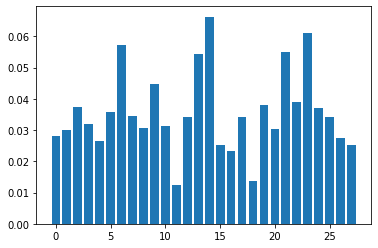

In [415]:
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

Text(0.5, 1.0, 'Feature importance')

<Figure size 3600x2520 with 0 Axes>

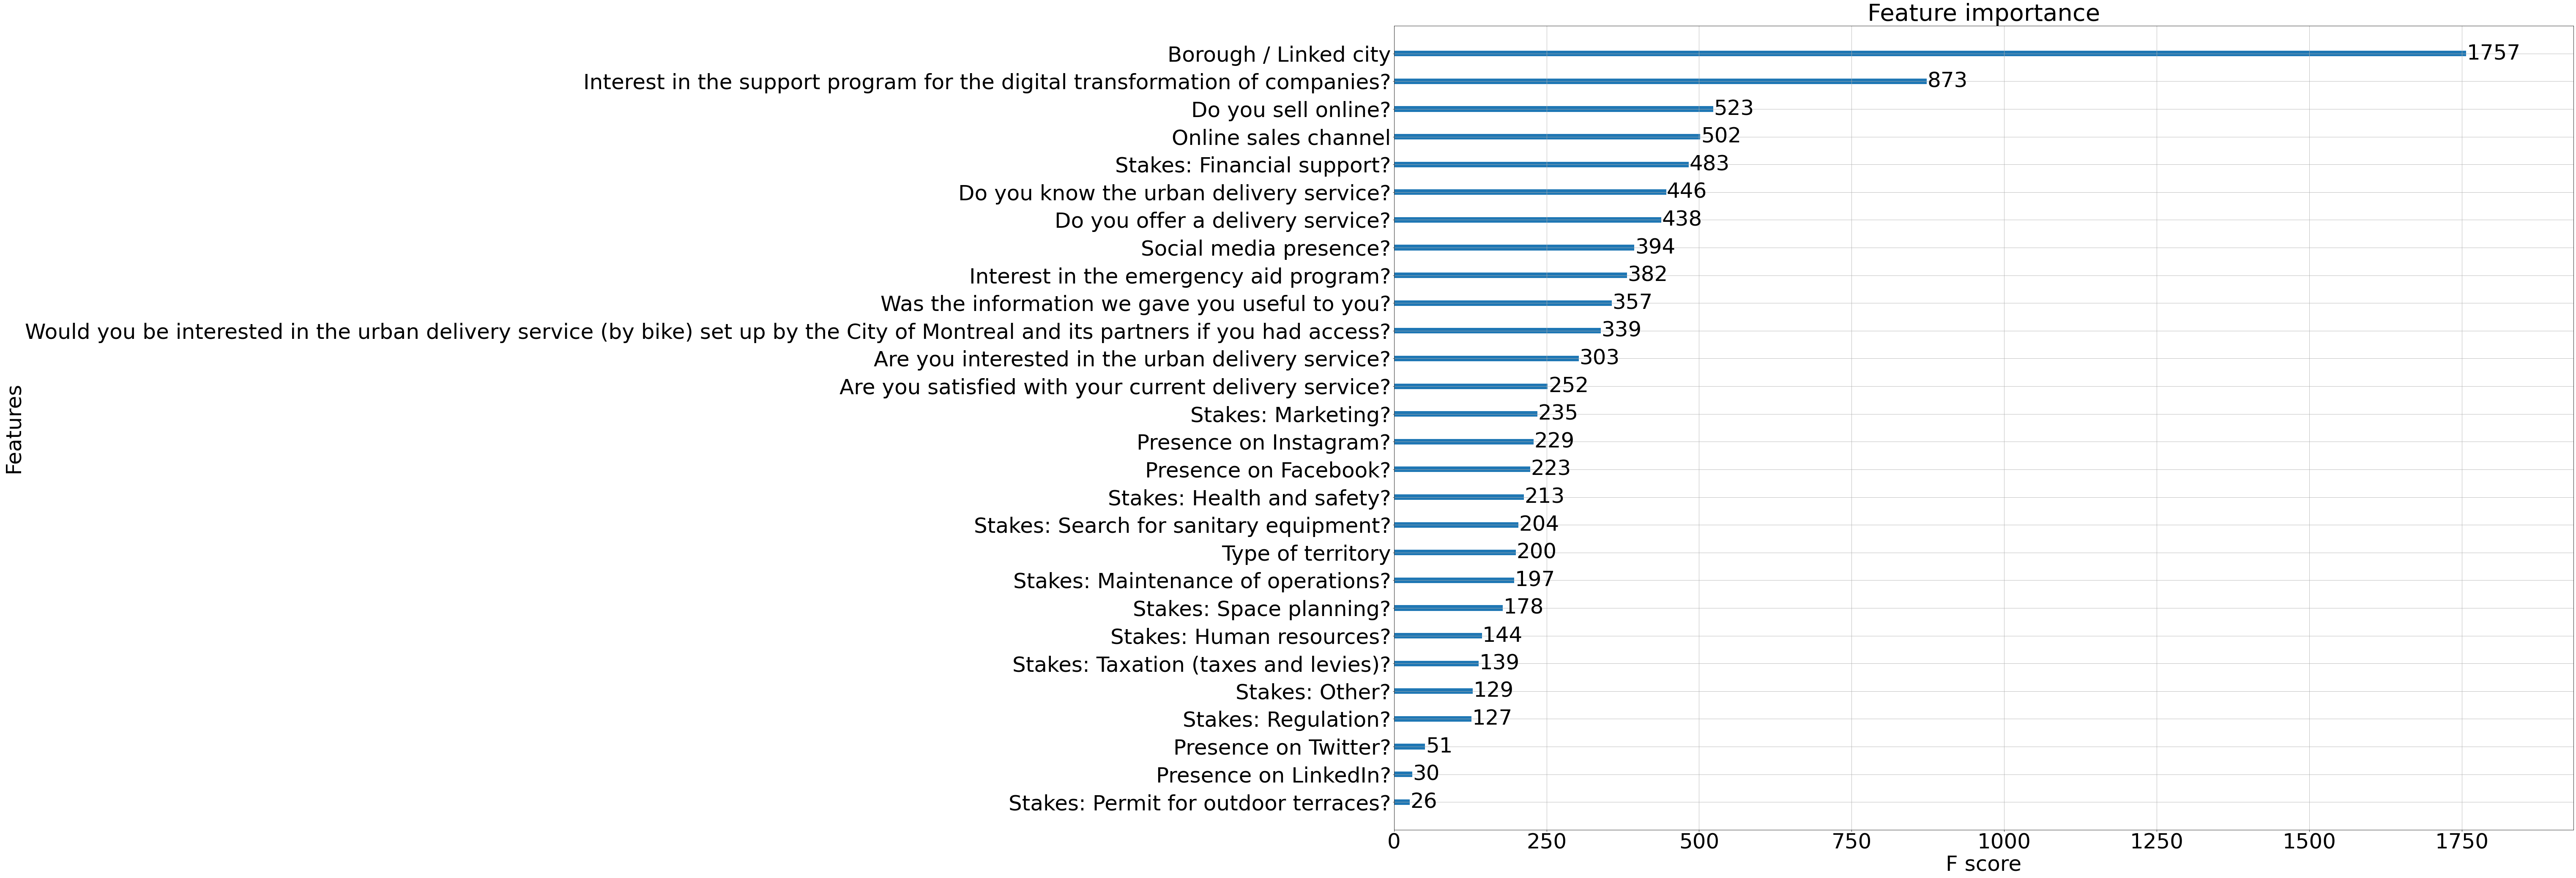

In [426]:
# plot feature importance
from xgboost import plot_importance
# plot_importance(model)
# pyplot.show()
f = plt.figure(figsize=(50, 35))

ax = plot_importance(model)
fig = ax.figure
fig.set_size_inches(50, 35)
# plt.yticks(range(df1.shape[1]), df1.columns, fontsize=40)

SMALL_SIZE = 50
MEDIUM_SIZE = 50
BIGGER_SIZE = 50

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.title('Feature importance', fontsize=56);
plt.savefig("Feature_importance.png", bbox_inches='tight', pad_inches=0.0)